# Weather Forecasting Using LSTMs

## Import CSV file for training

In [6]:
import pandas as pd
import numpy as np

file1_path = 'data/Raw_data_1Day_2020_site_117_ITO_Delhi_CPCB_1Day.csv'
file2_path = 'data/Raw_data_1Day_2021_site_117_ITO_Delhi_CPCB_1Day.csv'

df1 = pd.read_csv(file1_path, parse_dates=['Timestamp'])
df2 = pd.read_csv(file2_path, parse_dates=['Timestamp'])

concatenated_df = pd.concat([df1, df2], axis=0)
concatenated_df = concatenated_df.set_index('Timestamp')

column_names = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)'
]

df = concatenated_df[column_names].copy()
df['season'] = np.cos((df.index.dayofyear / 365.25) * 2 * np.pi)

na_count = df.isna().sum()
print("missing values:", na_count, sep="\n")
df

missing values:
PM2.5 (µg/m³)     33
PM10 (µg/m³)     174
NO (µg/m³)        16
NO2 (µg/m³)       16
NOx (ppb)         16
season             0
dtype: int64


,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),season
Timestamp,,,,,,
2020-01-01,392.31,450.67,84.61,43.83,92.10,0.999852
2020-01-02,458.86,497.51,91.25,50.60,101.10,0.999408
2020-01-03,198.92,219.98,93.91,64.44,110.62,0.998669
2020-01-04,224.26,255.98,83.32,65.87,102.78,0.997634
2020-01-05,149.03,172.24,36.83,44.97,53.86,0.996303
...,...,...,...,...,...,...
2021-12-27,132.52,NaN,36.93,31.69,46.87,0.997329
2021-12-28,163.73,223.91,34.55,31.06,44.61,0.998438
2021-12-29,142.48,212.92,39.09,32.74,49.20,0.999251


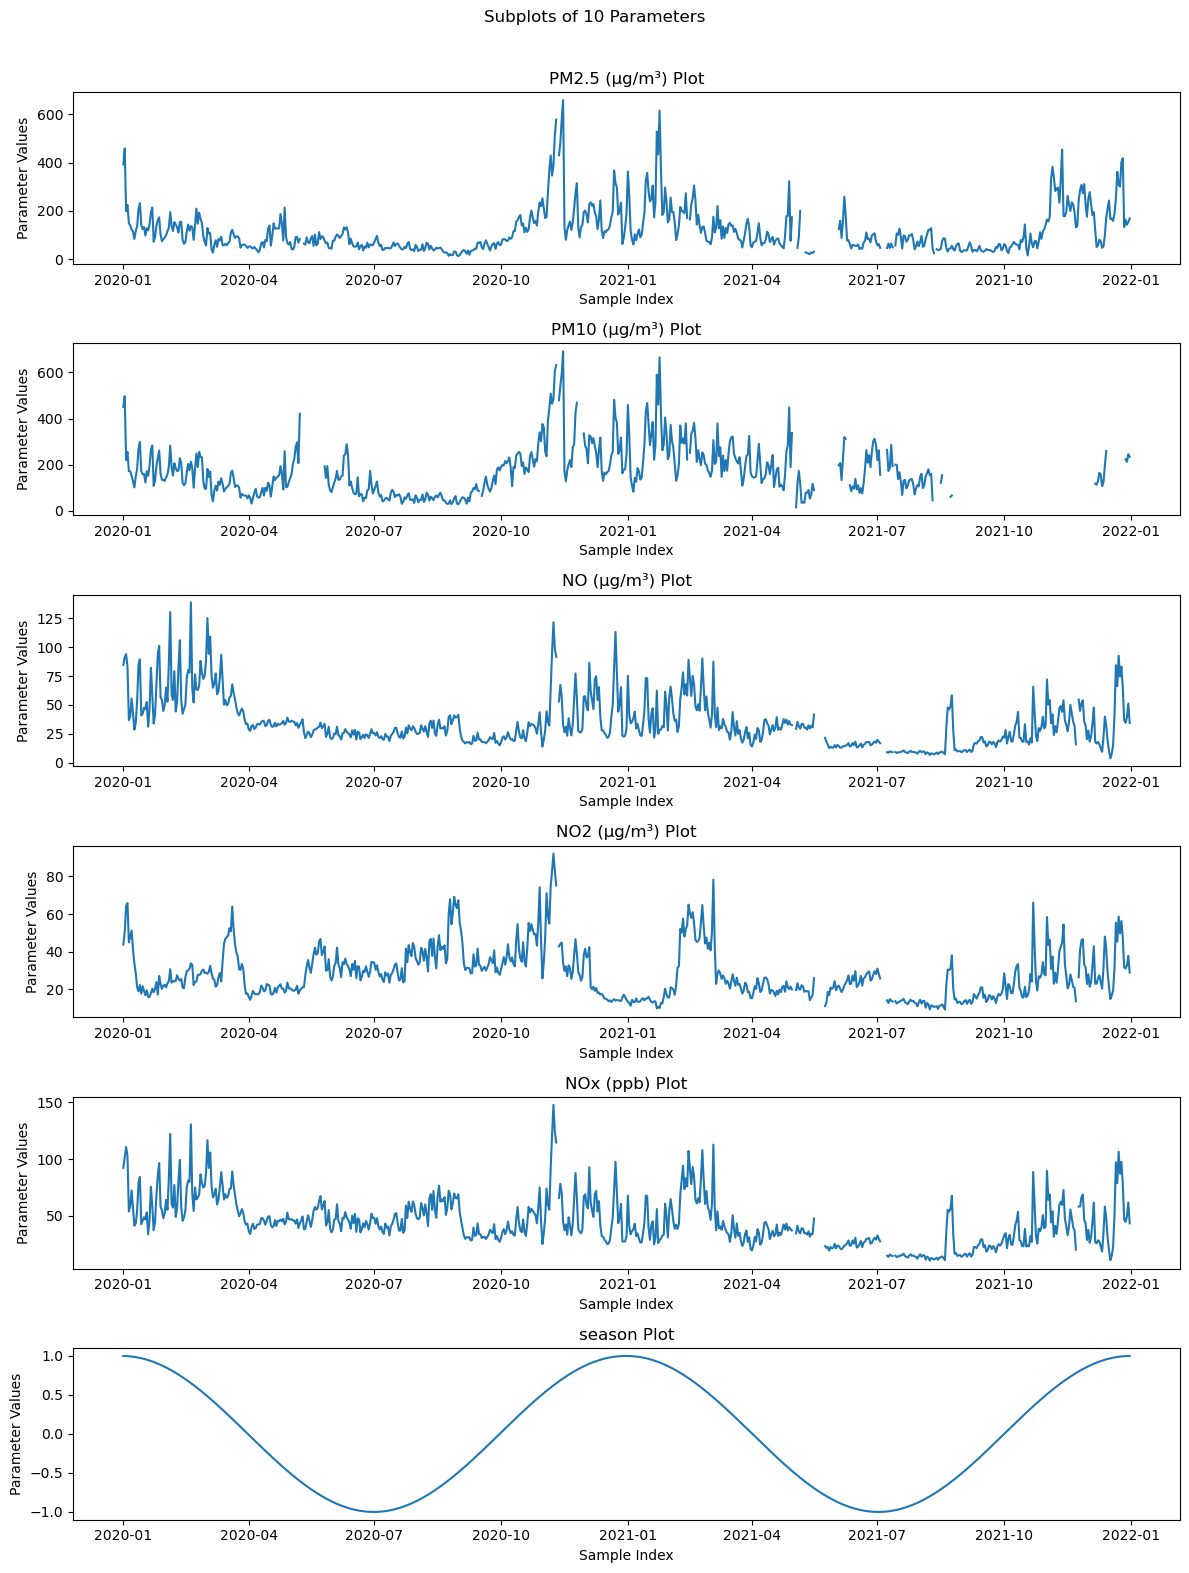

In [7]:
import matplotlib.pyplot as plt

def plot(df):
    fig, axs = plt.subplots(6, 1, figsize=(12, 16))
    fig.suptitle('Subplots of 10 Parameters')

    for i, ax in enumerate(axs.flat):
        column = df.columns[i]
        ax.plot(df.index, df[column], label=column)
        ax.set(title=f'{column} Plot', xlabel='Sample Index', ylabel='Parameter Values')

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust subplot layout
    plt.show()
    
plot(df)

## Preprocessing

In [8]:
pm2_5_avg = df['PM2.5 (µg/m³)'].mean()
pm10_avg = df['PM10 (µg/m³)'].mean()

pm_ratio = pm10_avg / pm2_5_avg

# imputing pm10 values with pm2.5 values
df['PM10 (µg/m³)'] = df['PM10 (µg/m³)'].fillna(df['PM2.5 (µg/m³)']*pm_ratio)

df = df.interpolate()
na_count = df.isna().sum()
print("missing values:", na_count, sep="\n")

missing values:
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO (µg/m³)       0
NO2 (µg/m³)      0
NOx (ppb)        0
season           0
dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

final_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

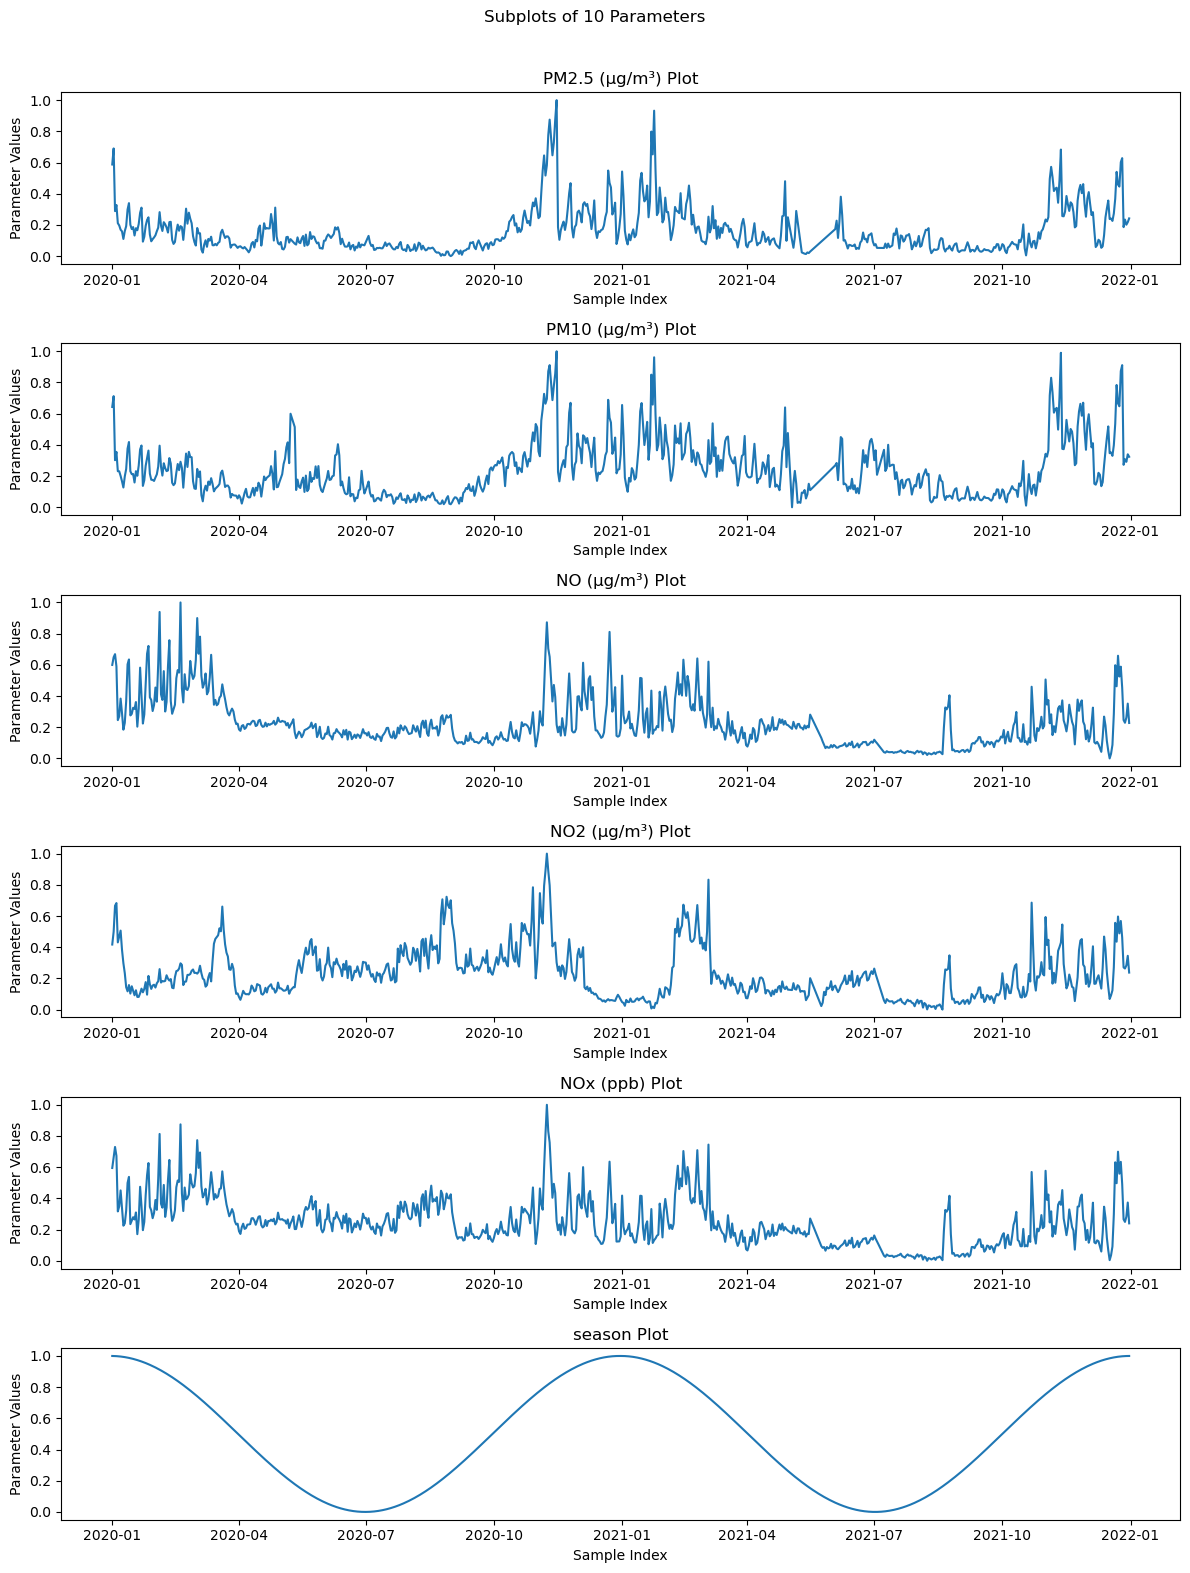

In [10]:
plot(final_df)

## Import and preprocess valdiation and test data

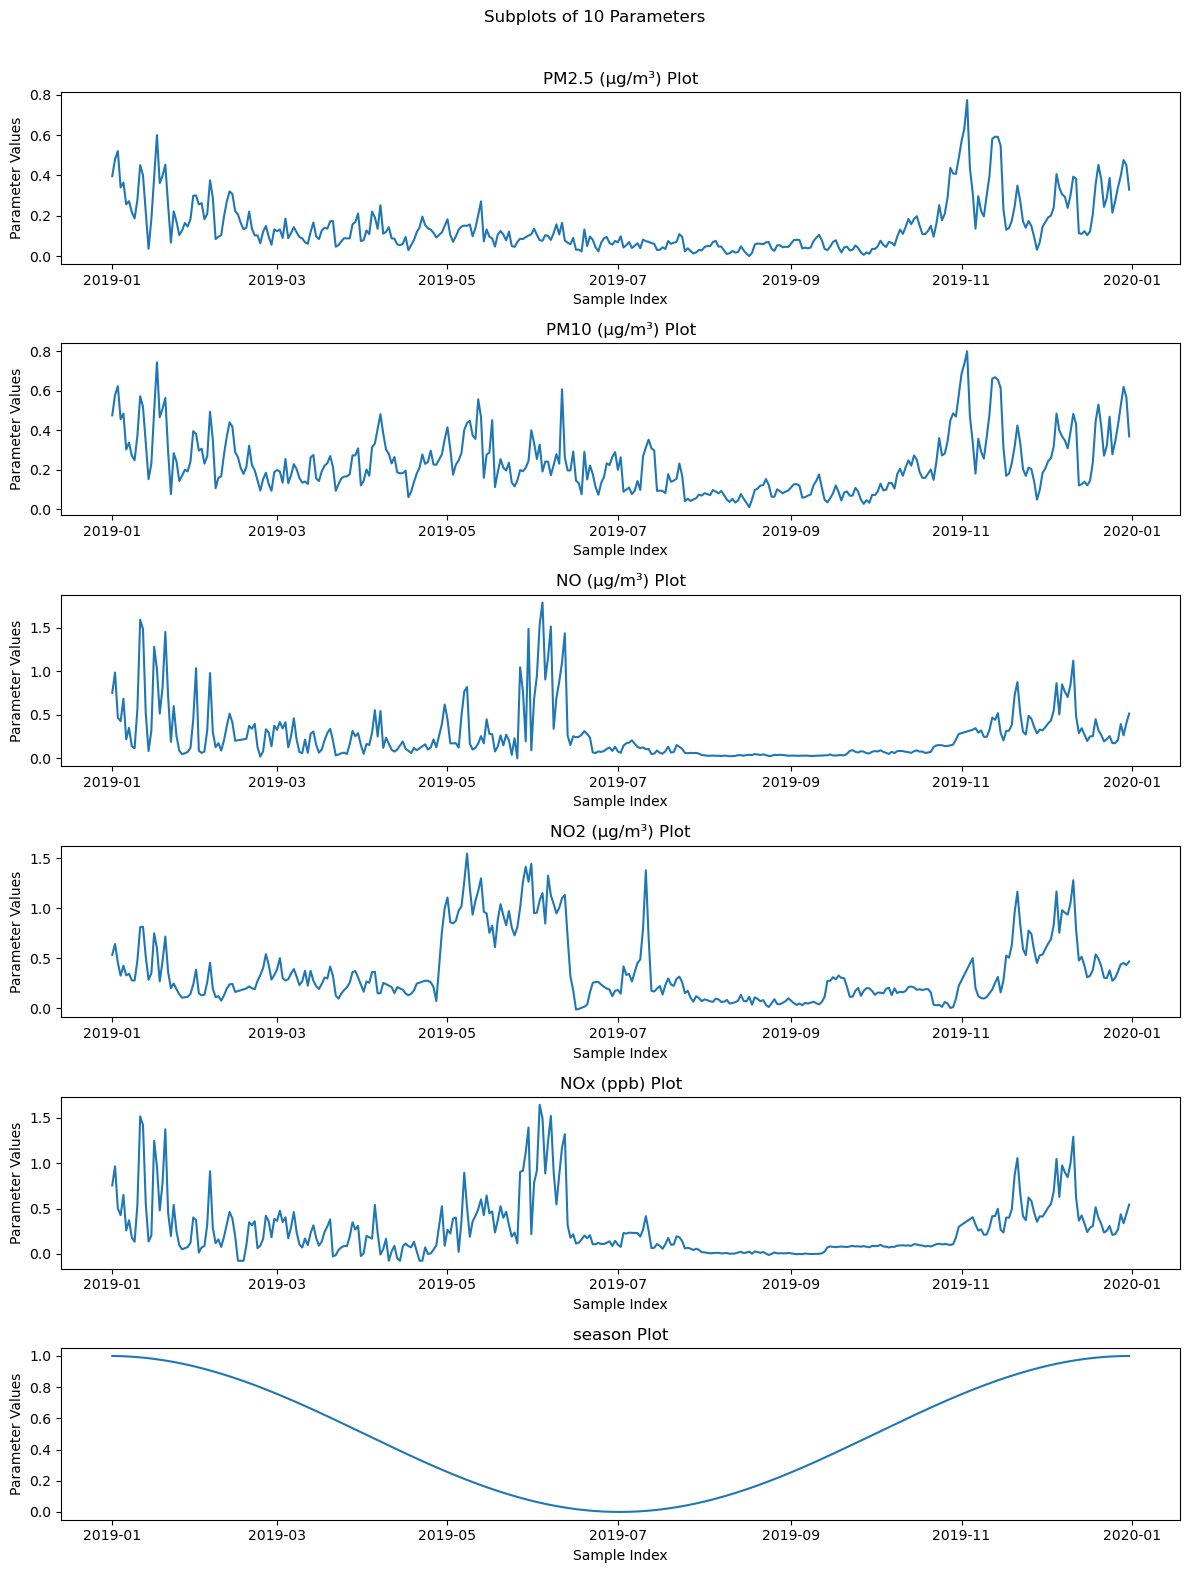

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),season
Timestamp,,,,,,
2019-01-01,0.396627,0.475260,0.752130,0.533711,0.753894,0.999931
2019-01-02,0.480454,0.578317,0.986588,0.642504,0.964842,0.999709
2019-01-03,0.521046,0.622855,0.466988,0.456037,0.500437,0.999339
2019-01-04,0.340748,0.455892,0.425565,0.325292,0.425753,0.998821
2019-01-05,0.364661,0.483828,0.684772,0.424798,0.649731,0.998156
...,...,...,...,...,...,...
2019-12-27,0.341273,0.425367,0.213116,0.368713,0.270636,0.998669
2019-12-28,0.397895,0.524873,0.392812,0.438548,0.436526,0.999223
2019-12-29,0.476342,0.619511,0.262764,0.452539,0.337167,0.999630


In [11]:
valid_df = pd.read_csv('data/Raw_data_1Day_2019_site_117_ITO_Delhi_CPCB_1Day.csv', parse_dates=['Timestamp'])
valid_df = valid_df.set_index('Timestamp')
valid_df = valid_df[column_names].copy()
valid_df['season'] = np.cos((valid_df.index.dayofyear / 365.25) * 2 * np.pi)
valid_df['PM10 (µg/m³)'] = valid_df['PM10 (µg/m³)'].fillna(valid_df['PM2.5 (µg/m³)']*pm_ratio)
valid_df = valid_df.interpolate()
valid_final_df = pd.DataFrame(scaler.transform(valid_df), columns=valid_df.columns, index=valid_df.index)
plot(valid_final_df)
valid_final_df

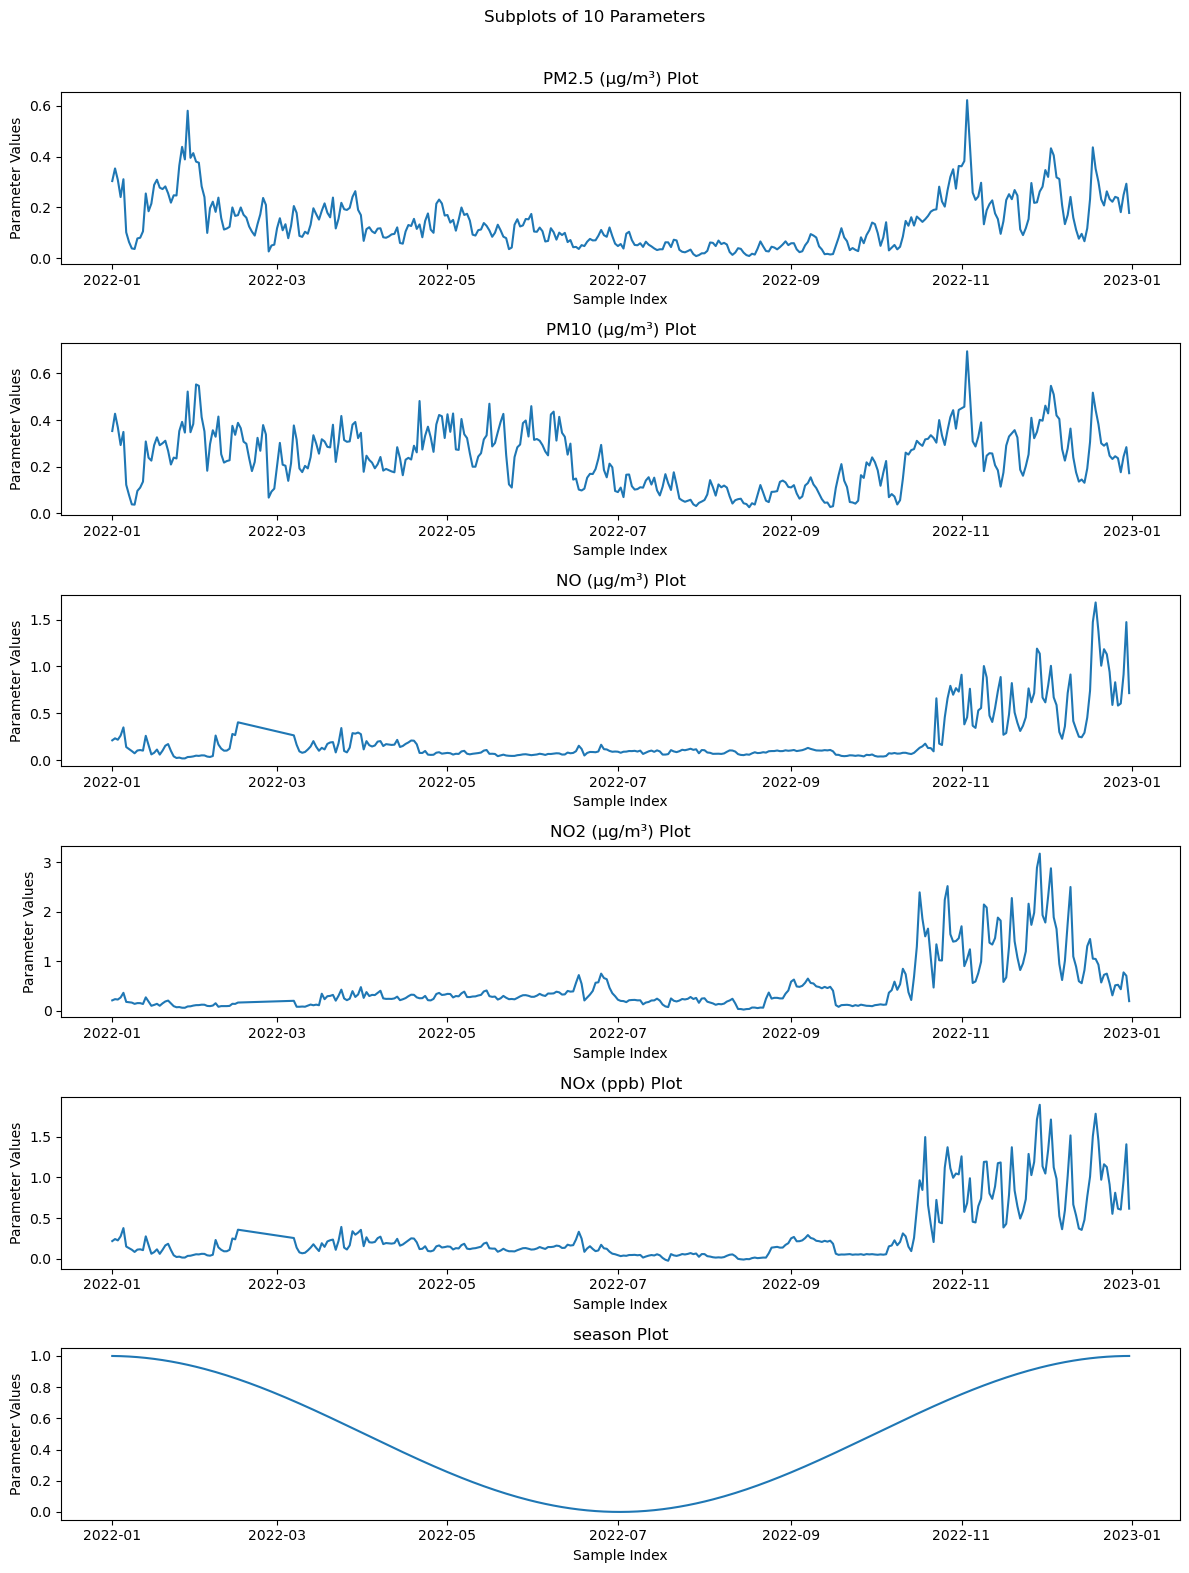

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),season
Timestamp,,,,,,
2022-01-01,0.303711,0.352909,0.211263,0.212520,0.219028,0.999931
2022-01-02,0.353408,0.427187,0.232753,0.236883,0.243995,0.999709
2022-01-03,0.308163,0.368608,0.217784,0.229044,0.227544,0.999339
2022-01-04,0.240722,0.292480,0.262245,0.270655,0.277187,0.998821
2022-01-05,0.310868,0.348973,0.349537,0.364612,0.378294,0.998156
...,...,...,...,...,...,...
2022-12-27,0.237197,0.235899,0.582438,0.526354,0.616174,0.998669
2022-12-28,0.181117,0.175752,0.604520,0.436859,0.605110,0.999223
2022-12-29,0.249069,0.242779,0.914635,0.776384,0.961785,0.999630


In [12]:
test_df = pd.read_csv('data/Raw_data_1Day_2022_site_117_ITO_Delhi_CPCB_1Day.csv', parse_dates=['Timestamp'])
test_df = test_df.set_index('Timestamp')
test_df = test_df[column_names].copy()
test_df['season'] = np.cos((test_df.index.dayofyear / 365.25) * 2 * np.pi)
test_df['PM10 (µg/m³)'] = test_df['PM10 (µg/m³)'].fillna(test_df['PM2.5 (µg/m³)']*pm_ratio)
test_df_filled = test_df.interpolate()
test_final_df = pd.DataFrame(scaler.transform(test_df_filled), columns=test_df_filled.columns, index=test_df_filled.index)
plot(test_final_df)
test_final_df

# Define Loader

In [13]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

def get_loader(df, skip=False, sequence_length=100, batch_size=64):
        
    X = df[:-1].values
    y = df.shift(-1)[:-1].values

    sequence_length = 100
    X_sequences = []
    y_sequences = []

    for i in range(len(X) - sequence_length + 1):
        X_sequences.append(X[i:i + sequence_length, :])
        y_sequences.append(y[i + sequence_length - 1, :])

    X_sequences = np.array(X_sequences)
    y_sequences = np.array(y_sequences)

    dataset = TensorDataset(torch.Tensor(X_sequences), torch.Tensor(y_sequences))
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    return loader

train_loader = get_loader(final_df) 
valid_loader = get_loader(valid_final_df)
test_loader = get_loader(test_final_df)

## Loss for validation dataset

In [15]:
def get_valid_loss(model, criterion, valid_loader, device):
    model.eval()
    valid_loss = 0
    for inputs, targets in valid_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        output = model(inputs)
        loss = criterion(output, targets)
        valid_loss += loss.item()
    model.train()
    return valid_loss / len(valid_loader)

## Model definition

In [16]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import CosineAnnealingLR

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.3)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :] # extracts the hidden state at the last time step of each sequence and passes to fc
        out = self.dropout(out)
        out = self.fc1(out)
        # out = self.batchnorm1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        # out = self.batchnorm2(out) 
        return out

## Training Loop

Epoch [50/1000], Loss: 0.0110, Learning_rate: 0.0009938441702975701
Epoch [100/1000], Loss: 0.0085, Learning_rate: 0.000975528258147579
Epoch [150/1000], Loss: 0.0074, Learning_rate: 0.0009455032620941848
Epoch [200/1000], Loss: 0.0085, Learning_rate: 0.0009045084971874737
Epoch [250/1000], Loss: 0.0063, Learning_rate: 0.0008535533905932733
Epoch [300/1000], Loss: 0.0078, Learning_rate: 0.0007938926261462358
Epoch [350/1000], Loss: 0.0093, Learning_rate: 0.000726995249869774
Epoch [400/1000], Loss: 0.0044, Learning_rate: 0.0006545084971874761
Epoch [450/1000], Loss: 0.0046, Learning_rate: 0.0005782172325201172
Epoch [500/1000], Loss: 0.0031, Learning_rate: 0.0005000000000000028
Epoch [550/1000], Loss: 0.0039, Learning_rate: 0.00042178276747988666
Epoch [600/1000], Loss: 0.0043, Learning_rate: 0.0003454915028125278
Epoch [650/1000], Loss: 0.0043, Learning_rate: 0.00027300475013022733
Epoch [700/1000], Loss: 0.0042, Learning_rate: 0.0002061073738537642
Epoch [750/1000], Loss: 0.0045, Lea

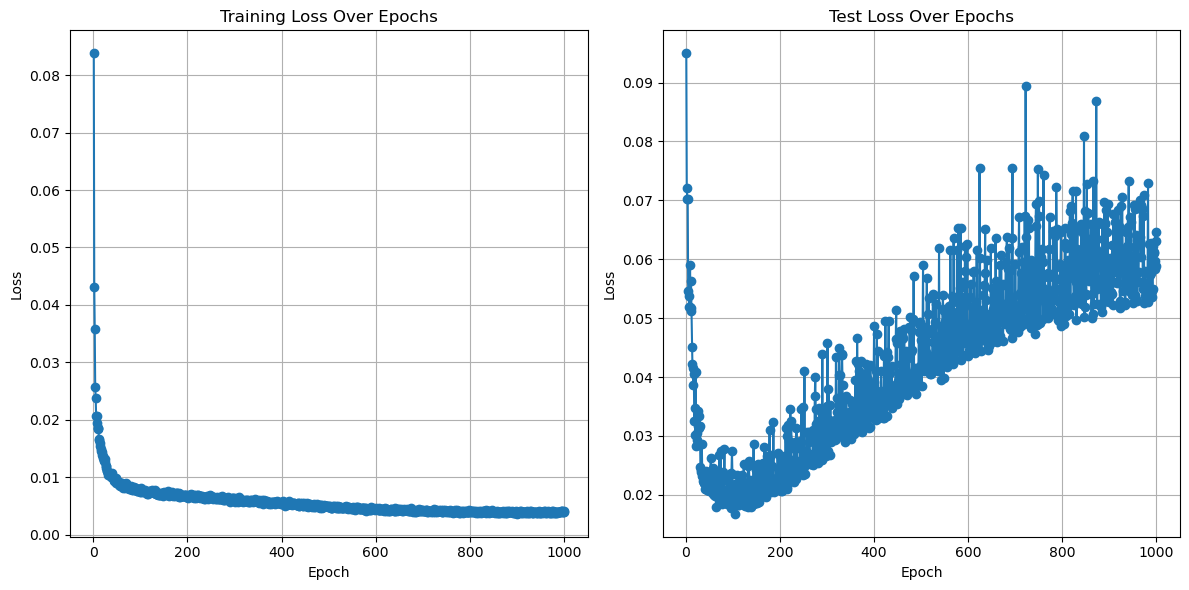

In [18]:
# Hyperparameters
input_size = 6  # Number of input features
hidden_size = 64
num_layers = 2
output_size = 6  # Number of output features
num_epochs = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs*len(train_loader))

losses = []
valid_losses = []
best_valid_loss = float('inf')

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)
    valid_loss = get_valid_loss(model, criterion, valid_loader, device)
    valid_losses.append(valid_loss)
    
    # if valid_loss < best_valid_loss:
    #     best_valid_loader_loss = valid_loss
    #     torch.save(model.state_dict(), 'best_model.pth')

    if (epoch+1)%50==0:
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Learning_rate: {scheduler.get_last_lr()[0]}')


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Training Loss
axs[0].plot(range(1, num_epochs + 1), losses, marker='o')
axs[0].set_title('Training Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

# Plot 2: Test Losses
axs[1].plot(range(1, num_epochs + 1), valid_losses, marker='o')
axs[1].set_title('Test Loss Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Loading model with best performance of validation dataset

In [19]:
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [27]:
def get_predictions(model, df):
    model.eval()
    model.to('cpu')

    input_sequence = df[-110:-10]
    input_sequence = torch.Tensor(input_sequence.values).unsqueeze(0)

    # Initialize an array to store the predictions for the next 10 data points
    predicted_sequence = []

    with torch.no_grad():
        for _ in range(10):
            prediction = model(input_sequence)
            #print(prediction)
        
            predicted_sequence.append(prediction.squeeze(0).tolist())

            # Update the input sequence for the next iteration
            input_sequence = torch.cat([input_sequence, prediction.unsqueeze(1)], dim=1)
            
    predicted_sequence = np.array(predicted_sequence)
    lstm_pred = pd.DataFrame(scaler.inverse_transform(predicted_sequence), columns=final_df.columns, index=df[-10:].index)
    return lstm_pred

def plot_comparison(ax, df, pred, col):
    # Ground truth plot
    ax.plot(df.index[-30:], df[col][-30:], label='Ground truth')
    
    # LSTM prediction plot
    ax.plot(df.index[-11:], pd.concat([pd.Series(df[col].iloc[-11]), pred[col]]), label='LSTM')
    
    ax.set_title(f'Comparative plots for predicted {col} trends (Zoomed in for clarity)')
    ax.legend()
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(col)

## Evaluation metric - mean average error

In [35]:
from sklearn.metrics import mean_absolute_error

# ground truth values
def calc_mae(gt, pred, ax):
    mae_values = []

    for col in column_names:
        mae = mean_absolute_error(gt[col], pred[col])
        print(f"{col}: {mae}")
        mae_values.append(mae)

    overall_mae = mean_absolute_error(gt[column_names], pred[column_names])
    print(f"Overall: {overall_mae}")
    
    # # Plotting
    # fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(column_names, mae_values, color='skyblue')
    ax.axhline(y=overall_mae, color='red', linestyle='--', label='Overall MAE')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Mean Absolute Error')
    ax.set_title('Mean Absolute Error for each column')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Prediction and metrics on the test set

PM2.5 (µg/m³): 56.83821181042494
PM10 (µg/m³): 36.28886737060547
NO (µg/m³): 63.392549162954104
NO2 (µg/m³): 17.230638970553873
NOx (ppb): 53.55627063894273
Overall: 45.46130759069622


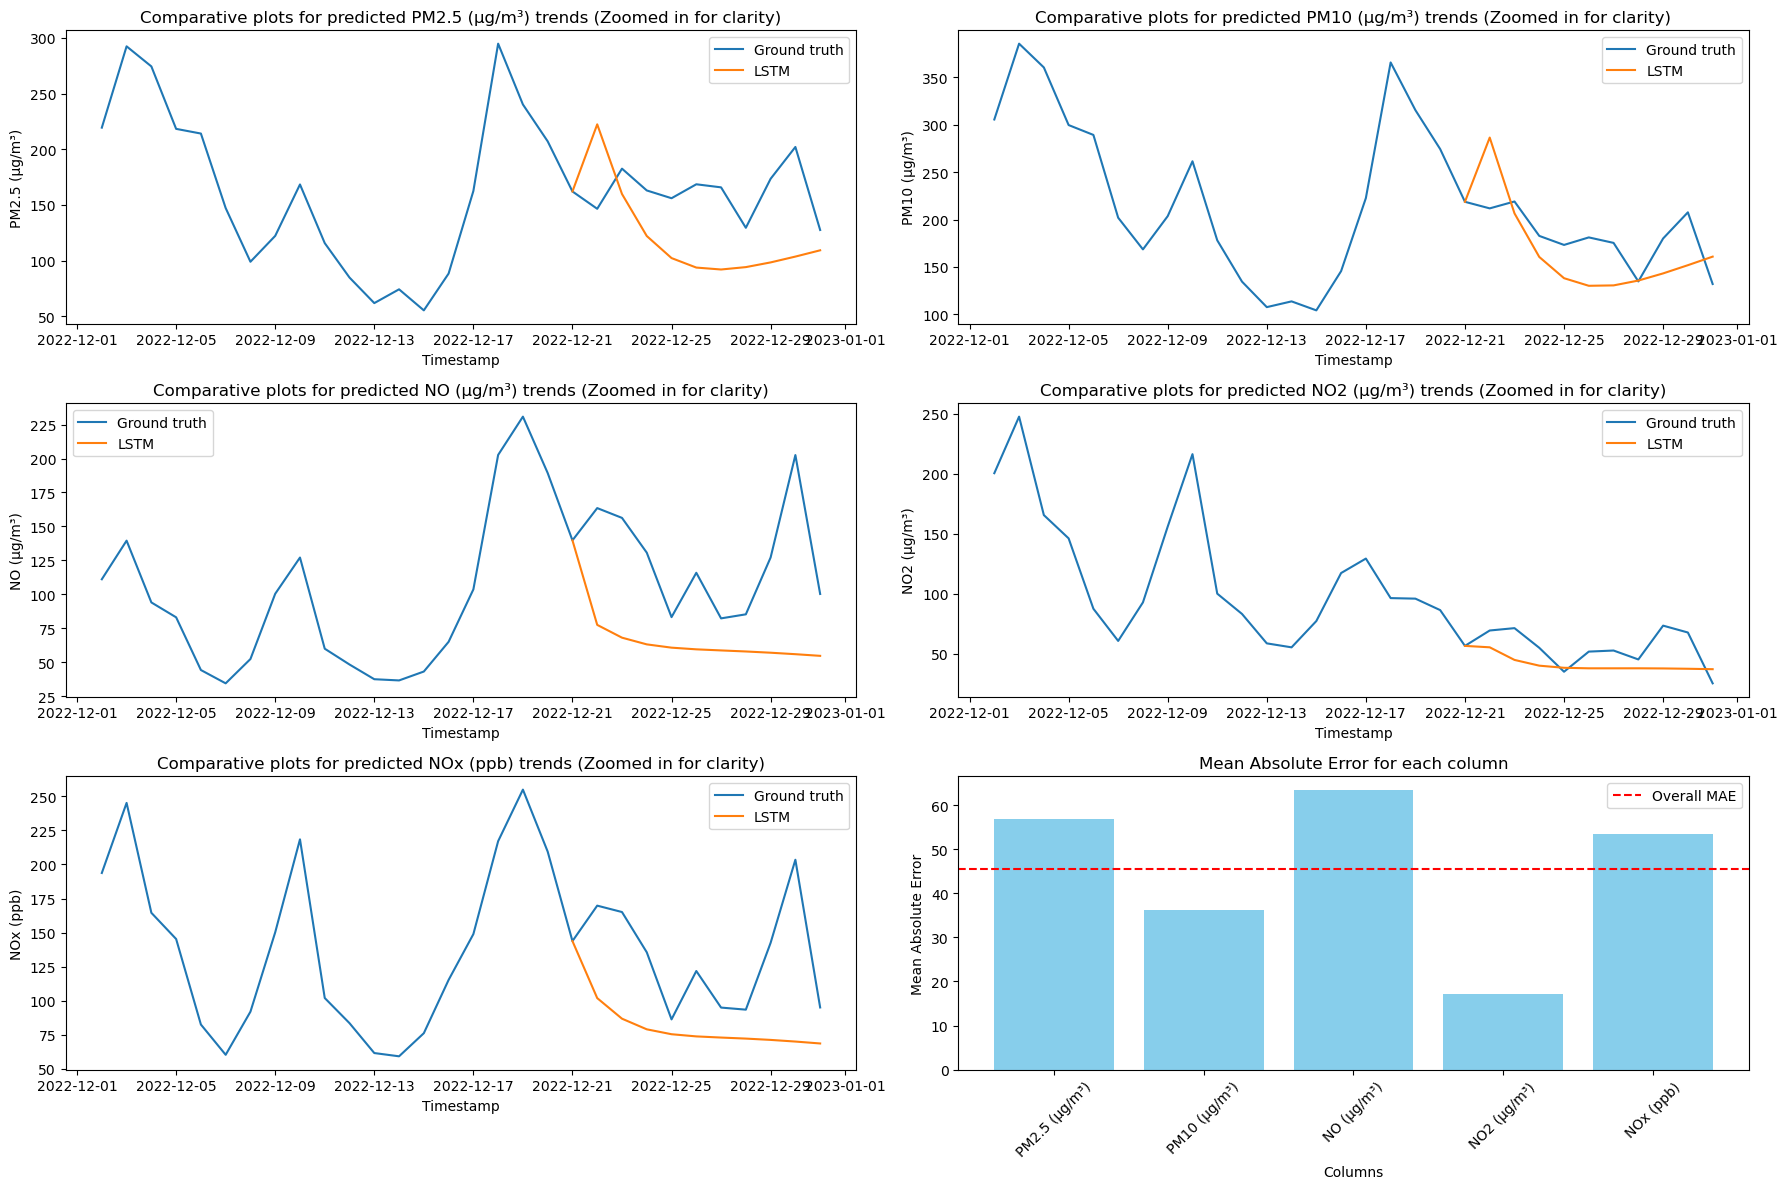

<Figure size 640x480 with 0 Axes>

In [36]:
lstm_pred = get_predictions(model, test_final_df)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate through columns and create subplots
for i, col in enumerate(df.columns):
    if col == 'season':
        continue
    plot_comparison(axes[i], test_df, lstm_pred, col)

calc_mae(test_df[-10:], lstm_pred, axes[5])

plt.tight_layout()
plt.show()

PM2.5 (µg/m³): 56.83821181042494
PM10 (µg/m³): 36.28886737060547
NO (µg/m³): 63.392549162954104
NO2 (µg/m³): 17.230638970553873
NOx (ppb): 53.55627063894273
season: 0.44727277757881073
Overall: 37.95896845517665
PM2.5 (µg/m³): 56.83821181042494
PM10 (µg/m³): 36.28886737060547
NO (µg/m³): 63.392549162954104
NO2 (µg/m³): 17.230638970553873
NOx (ppb): 53.55627063894273
season: 0.44727277757881073
Overall: 37.95896845517665
PM2.5 (µg/m³): 56.83821181042494
PM10 (µg/m³): 36.28886737060547
NO (µg/m³): 63.392549162954104
NO2 (µg/m³): 17.230638970553873
NOx (ppb): 53.55627063894273
season: 0.44727277757881073
Overall: 37.95896845517665


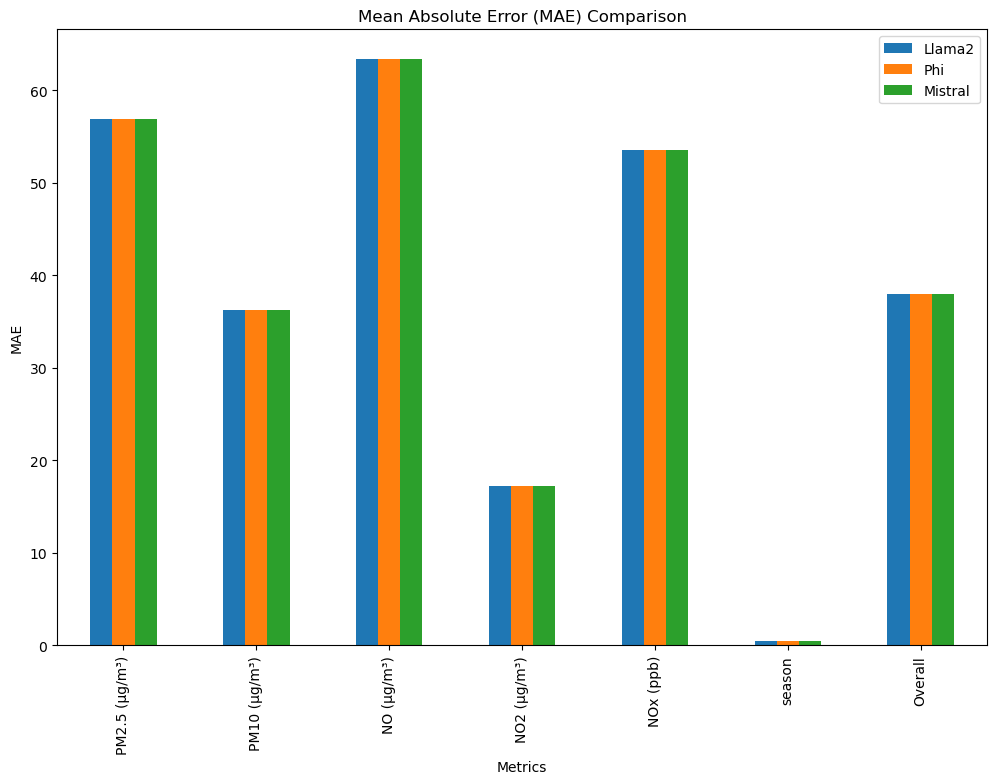

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

lstm_pred1 = get_predictions(model, test_final_df)
lstm_pred2 = get_predictions(model, test_final_df)
lstm_pred3 = get_predictions(model, test_final_df)

def calc_mae(gt, pred):
    mae_values = {}
    
    for col in gt.columns:
        mae = mean_absolute_error(gt[col], pred[col])
        mae_values[col] = mae
        print(f"{col}: {mae}")

    overall_mae = mean_absolute_error(gt, pred)
    mae_values['Overall'] = overall_mae
    print(f"Overall: {overall_mae}")
    
    return mae_values

# Assuming you have DataFrames for ground truth (gt_df) and three sets of predictions (pred1_df, pred2_df, pred3_df)
gt_df = test_df[-10:]  # Replace this with your ground truth DataFrame
pred1_df = lstm_pred1  # Replace this with your first set of predictions DataFrame
pred2_df = lstm_pred2  # Replace this with your second set of predictions DataFrame
pred3_df = lstm_pred3  # Replace this with your third set of predictions DataFrame

# Calculate MAE for each set of predictions
mae_values_pred1 = calc_mae(gt_df, pred1_df)
mae_values_pred2 = calc_mae(gt_df, pred2_df)
mae_values_pred3 = calc_mae(gt_df, pred3_df)

# Create a DataFrame to hold the MAE values for each prediction
mae_df = pd.DataFrame({
    'Llama2': mae_values_pred1.values(),
    'Phi': mae_values_pred2.values(),
    'Mistral': mae_values_pred3.values()
}, index=mae_values_pred1.keys())

# Add a row for overall MAE
mae_df.loc['Overall'] = [mae_values_pred1['Overall'], mae_values_pred2['Overall'], mae_values_pred3['Overall']]

# Plotting the multi-bar graph
ax = mae_df.plot(kind='bar', figsize=(12, 8))
ax.set_title('Mean Absolute Error (MAE) Comparison')
ax.set_ylabel('MAE')
ax.set_xlabel('Metrics')

plt.show()
